In [2]:
import matplotlib
import pandas as pd
import networkx as nx

In [26]:
df = pd.read_csv("2017_-_2018_School_Locations.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df = df[['ats_system_code', 'location_name', 'grades_text','location_1']]
df['zip'] = df['location_1'].str.split('\n').str[1]
df['zip'] = df.zip.str.replace(r"[a-zA-Z,','']",'')
df['location_name'] = df['location_name'].str.lower()
df = df[['ats_system_code','location_name','zip']]
df.columns = ['dbn', 'school_name','zip']
df = df[pd.notnull(df['zip'])]
df.sort_values(by=['dbn'], inplace=True)
df.head()

,dbn,school_name,zip
0,01M015,p.s. 015 roberto clemente,10009
1,01M019,p.s. 019 asher levy,10003
2,01M020,p.s. 020 anna silver,10002
3,01M034,p.s. 034 franklin d. roosevelt,10009
4,01M063,the star academy - p.s.63,10009


In [27]:
dfshsat = pd.read_csv("nyc-shsat-data.csv")
dfshsat.columns = dfshsat.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
dfshsat = dfshsat[dfshsat["offers"] != 's']
dfshsat = dfshsat[dfshsat["offers"] != 's^']
dfshsat = dfshsat[dfshsat["testers"] != 's']
dfshsat['offers'] = dfshsat['offers'].astype(int)
dfshsat['testers'] = dfshsat['testers'].astype(int)
dfshsat['school_name'] = dfshsat['school_name'].str.lower()
dfshsat['accpt_decile'] = (dfshsat['offers'] / dfshsat['testers'] * 10).astype(int)
dfshsat = dfshsat[['dbn', 'school_name','accpt_decile']]
dfshsat.sort_values(by=['accpt_decile'], ascending=False, inplace=True)
dfshsat.head()

,dbn,school_name,accpt_decile
470,20K187,the christa mcauliffe school\i.s. 187,8
491,03M334,the anderson school,7
480,01M539,"new explorations into science, technology and ...",7
486,02M114,east side middle school,6
498,30Q122,p.s. 122 mamie fay,6


In [28]:
df_cd = pd.merge(df, dfshsat, how='inner', on = 'school_name')
df_cd.sort_values(by=['accpt_decile'], ascending=False, inplace=True)
df_cd['zip'] = df_cd['zip'].str.replace(" ","")
df_cd['dbn_x'] = df_cd['dbn_x'].str.replace(" ","")
df_cd.head()

,dbn_x,school_name,zip,dbn_y,accpt_decile
44,20K187,the christa mcauliffe school\i.s. 187,11219,20K187,8
18,03M334,the anderson school,10024,03M334,7
98,30Q300,the 30th avenue school (g&t citywide),11102,30Q300,6
92,30Q122,p.s. 122 mamie fay,11105,30Q122,6
3,02M114,east side middle school,10128,02M114,6


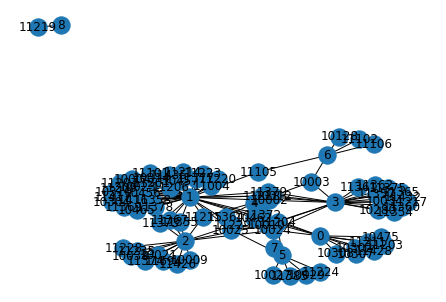

In [25]:
g = nx.from_pandas_edgelist(df_cd,'accpt_decile', 'zip')
nx.draw(g,  with_labels=True)

In [136]:
# Make a list of the zips, we'll use it later
zips = list(df_cd.zip.unique())
zips

['11219',
 '11224',
 '10025',
 '11215',
 '11235',
 '11228',
 '11365',
 '11364',
 '11354',
 '11361',
 '11362',
 '11229',
 '10021',
 '10128',
 '11378',
 '10003',
 '11106',
 '11385',
 '10024',
 '11357',
 '11355',
 '11375',
 '10010',
 '11374',
 '11217',
 '11105',
 '11204',
 '10312',
 '11373',
 '11377',
 '11004',
 '11214',
 '10457',
 '11358',
 '11206',
 '11694',
 '10029',
 '11369',
 '11220',
 '11372',
 '11102',
 '10314',
 '11435',
 '11417',
 '11432',
 '10002',
 '10027',
 '10280',
 '11416',
 '11360',
 '10038',
 '11223',
 '11379',
 '10009',
 '10310',
 '10462',
 '10308',
 '11101',
 '11209',
 '10304',
 '11428',
 '10034',
 '11207',
 '10004',
 '11218',
 '10307',
 '11426',
 '10475',
 '11201',
 '11211',
 '10465',
 '11203',
 '11367',
 '10302',
 '10023',
 '10456']

In [137]:
# Make a list of the schools, we'll use it later
schools = list(df_cd.dbn_x.unique())
schools

['20K187',
 '21K239',
 '03M054',
 '15K051',
 '21K098',
 '20K201',
 '26Q216',
 '26Q074',
 '25Q185',
 '20K259',
 '26Q158',
 '26Q067',
 '22K234',
 '02M167',
 '02M114',
 '24Q073',
 '02M255',
 '30Q580',
 '24Q119',
 '03M334',
 '25Q194',
 '25Q237',
 '28Q190',
 '02M104',
 '28Q157',
 '15K447',
 '30Q122',
 '20K686',
 '31R075',
 '24Q005',
 '20K180',
 '24Q125',
 '26Q172',
 '21K281',
 '10X118',
 '25Q025',
 '14K318',
 '27Q323',
 '04M012',
 '30Q227',
 '20K220',
 '30Q141',
 '30Q230',
 '30Q300',
 '31R072',
 '20K227',
 '28Q217',
 '27Q137',
 '28Q680',
 '01M184',
 '05M362',
 '02M276',
 '31R007',
 '27Q210',
 '25Q294',
 '20K229',
 '25Q281',
 '15K088',
 '03M245',
 '15K443',
 '20K223',
 '27Q202',
 '02M126',
 '24Q102',
 '02M260',
 '25Q189',
 '21K228',
 '02M413',
 '24Q049',
 '01M839',
 '03M243',
 '31R027',
 '11X083',
 '03M862',
 '31R024',
 '30Q291',
 '20K104',
 '02M397',
 '31R048',
 '29Q109',
 '28Q896',
 '06M278',
 '19K292',
 '11X127',
 '21K096',
 '22K206',
 '02M896',
 '84K707',
 '31R034',
 '02M407',
 '26Q266',

In [138]:
dict(zip(locs, locs))

{'11219': '11219',
 '11224': '11224',
 '10025': '10025',
 '11215': '11215',
 '11235': '11235',
 '11228': '11228',
 '11365': '11365',
 '11364': '11364',
 '11354': '11354',
 '11361': '11361',
 '11362': '11362',
 '11229': '11229',
 '10021': '10021',
 '10128': '10128',
 '11378': '11378',
 '10003': '10003',
 '11106': '11106',
 '11385': '11385',
 '10024': '10024',
 '11357': '11357',
 '11355': '11355',
 '11375': '11375',
 '10010': '10010',
 '11374': '11374',
 '11217': '11217',
 '11105': '11105',
 '11204': '11204',
 '10312': '10312',
 '11373': '11373',
 '11377': '11377',
 '11004': '11004',
 '11214': '11214',
 '10457': '10457',
 '11358': '11358',
 '11206': '11206',
 '11694': '11694',
 '10029': '10029',
 '11369': '11369',
 '11220': '11220',
 '11372': '11372',
 '11102': '11102',
 '10314': '10314',
 '11435': '11435',
 '11417': '11417',
 '11432': '11432',
 '10002': '10002',
 '10027': '10027',
 '10280': '10280',
 '11416': '11416',
 '11360': '11360',
 '10038': '10038',
 '11223': '11223',
 '11379': '1

In [139]:
# How many connections does 10028 have coming out of it?
g.degree('10456')

1

In [134]:
[zip for zip in zips]

['11219',
 '11224',
 '10025',
 '11215',
 '11235',
 '11228',
 '11365',
 '11364',
 '11354',
 '11361',
 '11362',
 '11229',
 '10021',
 '10128',
 '11378',
 '10003',
 '11106',
 '11385',
 '10024',
 '11357',
 '11355',
 '11375',
 '10010',
 '11374',
 '11217',
 '11105',
 '11204',
 '10312',
 '11373',
 '11377',
 '11004',
 '11214',
 '10457',
 '11358',
 '11206',
 '11694',
 '10029',
 '11369',
 '11220',
 '11372',
 '11102',
 '10314',
 '11435',
 '11417',
 '11432',
 '10002',
 '10027',
 '10280',
 '11416',
 '11360',
 '10038',
 '11223',
 '11379',
 '10009',
 '10310',
 '10462',
 '10308',
 '11101',
 '11209',
 '10304',
 '11428',
 '10034',
 '11207',
 '10004',
 '11218',
 '10307',
 '11426',
 '10475',
 '11201',
 '11211',
 '10465',
 '11203',
 '11367',
 '10302',
 '10023',
 '10456']

In [140]:
[g.degree(zip) for zip in zips]

[1,
 1,
 2,
 5,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 6,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1]

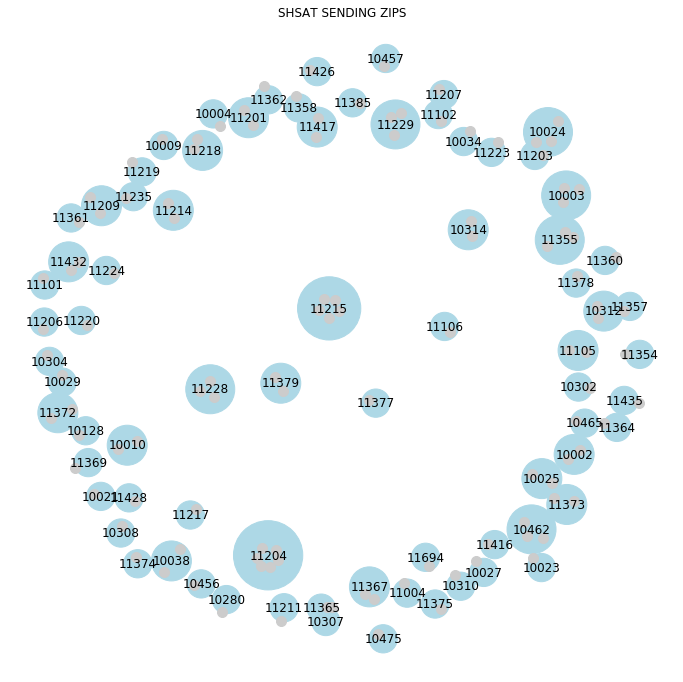

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(df_cd, source='dbn_x', target='zip') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
zip_size = [g.degree(zip) * 800 for zip in zips]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=zips, 
                       node_size=zip_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=schools, node_color='#cccccc', node_size=100)

# Draw POPULAR PEOPLE
popular_schools = [dbn_x for dbn_x in schools if g.degree(dbn_x) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_schools, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(zips, zips))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("SHSAT SENDING ZIPS")

# 5. Tell matplotlib to show it
plt.show()